In [6]:
%matplotlib inline

Adapted from
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [8]:
import numpy as np
from sklearn import datasets

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


In [61]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], quantile=.3, n_neighbors=10, fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if fname:
        plt.savefig(fname)


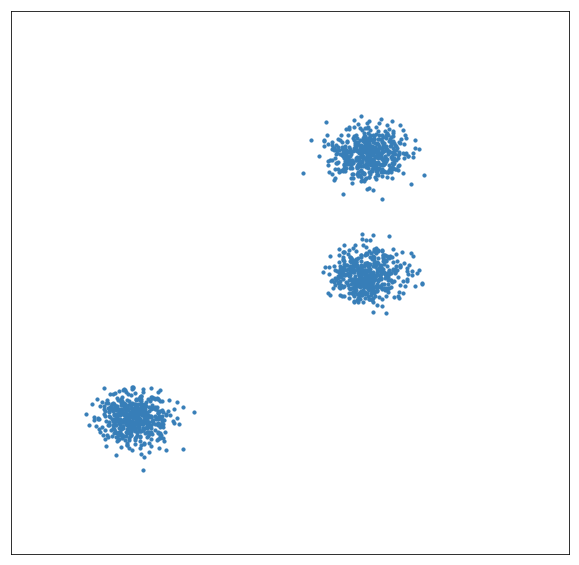

In [64]:
X, y = blobs
# plot_dataset(X, fname='blobs.png')
plot_dataset(X)

In [83]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

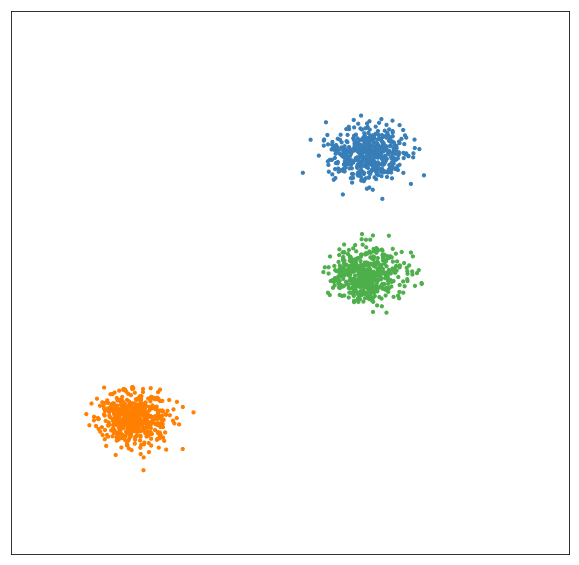

In [85]:
# plot_dataset(X, y_pred, fname='blobs_kmeans_3')
plot_dataset(X, y_pred)

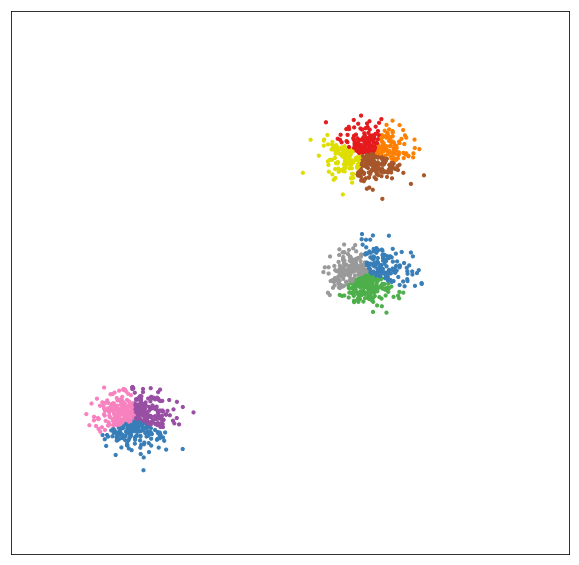

In [87]:
clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='blobs_kmeans_10')
plot_dataset(X, y_pred)

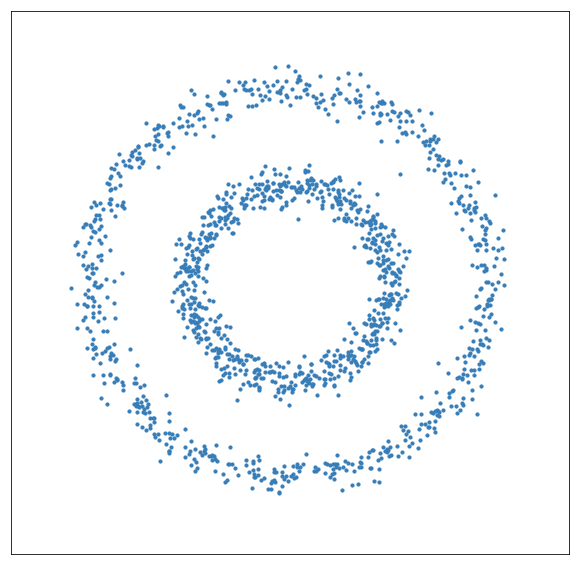

In [52]:
X, y = noisy_circles
plot_dataset(X)

In [53]:
from sklearn.cluster import KMeans
clusters = 2
clf = KMeans(n_clusters=clusters)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
y_pred = clf.predict(X)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

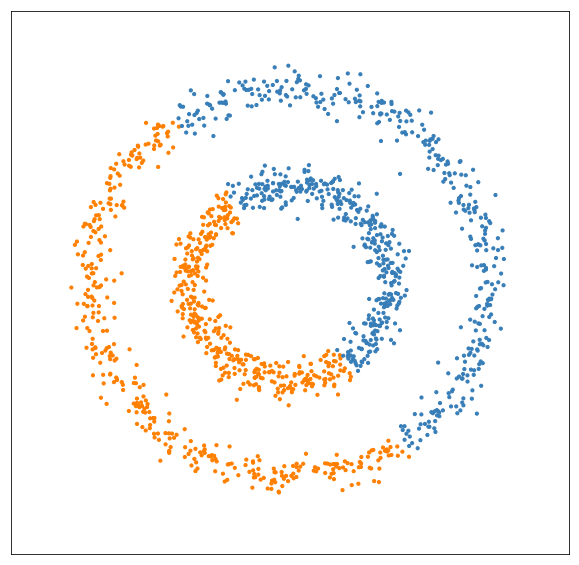

In [55]:
plot_dataset(X, y_pred)